# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [36]:
df = pd.read_csv('data/reviews_sentiment.csv', sep=";")
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [37]:
df2=df[['wordcount','sentimentValue','Star Rating']]
df2

,wordcount,sentimentValue,Star Rating
0,23,-0.486389,1
1,20,-0.586187,1
2,4,-0.602240,1
3,17,-0.616271,1
4,6,-0.651784,1
...,...,...,...
252,3,2.814818,5
253,1,2.924393,5
254,1,2.924393,5
255,1,2.924393,5


In [31]:
df2.describe()

,wordcount,sentimentValue,Star Rating
count,257.000000,257.000000,257.000000
mean,11.501946,0.383849,3.420233
std,13.159812,0.897987,1.409531
min,1.000000,-2.276469,1.000000
25%,3.000000,-0.108144,3.000000
50%,7.000000,0.264091,3.000000
75%,16.000000,0.808384,5.000000
max,103.000000,3.264579,5.000000


/var/folders/pq/mppvlq_j3_7b5gpr_bpc5khm0000gn/T/ipykernel_56377/2436567545.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Star Rating"], palette="Blues")


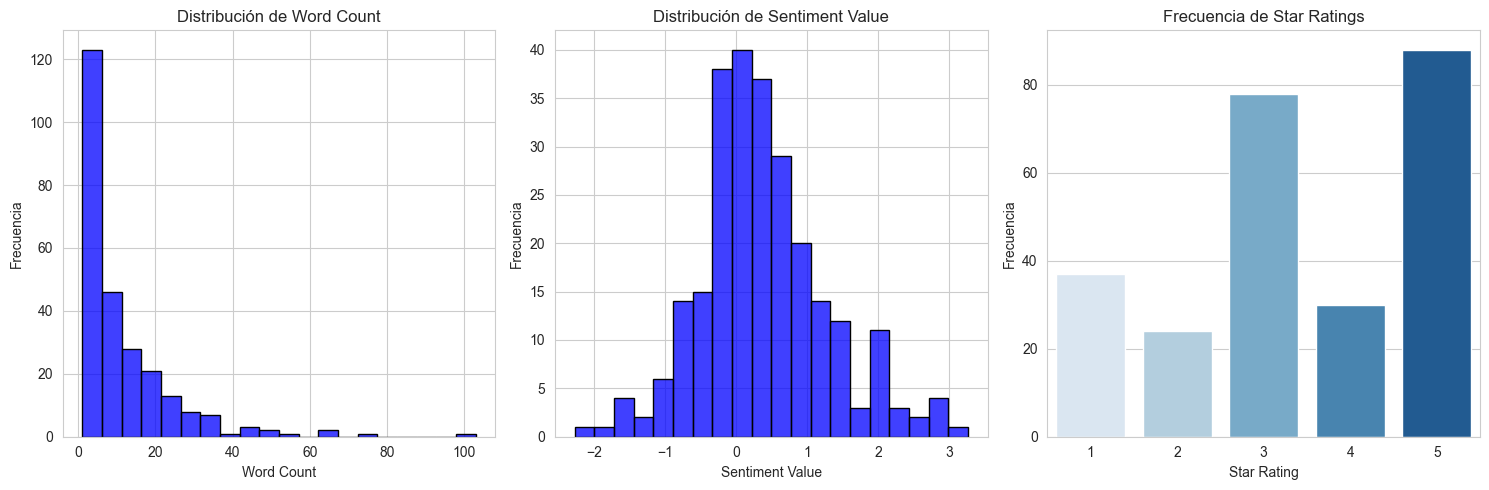

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Gráfico de barras para WordCount
plt.subplot(1, 3, 1)
sns.histplot(df["wordcount"], bins=20, color="Blue", edgecolor="black")
plt.xlabel("Word Count")
plt.ylabel("Frecuencia")
plt.title("Distribución de Word Count")

# Gráfico de barras para SentimentValue
plt.subplot(1, 3, 2)
sns.histplot(df["sentimentValue"], bins=20, color="Blue", edgecolor="black")
plt.xlabel("Sentiment Value")
plt.ylabel("Frecuencia")
plt.title("Distribución de Sentiment Value")

# Gráfico de barras para Star Rating
plt.subplot(1, 3, 3)
sns.countplot(x=df["Star Rating"], palette="Blues")
plt.xlabel("Star Rating")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Star Ratings")

# Ajustar el diseño
plt.tight_layout()
plt.show()


/var/folders/pq/mppvlq_j3_7b5gpr_bpc5khm0000gn/T/ipykernel_56377/3769477424.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["Star Rating"], palette="viridis")


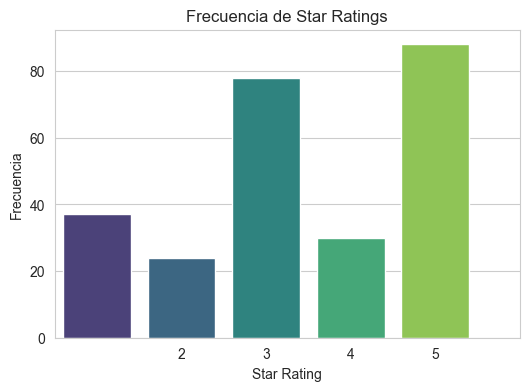

In [71]:

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))

# Gráfico de barras para Star Rating con solo valores enteros
ax = sns.countplot(x=df["Star Rating"], palette="viridis")

# Forzar números enteros en el eje X
ax.set_xticks(sorted(df["Star Rating"].unique()))  

plt.xlabel("Star Rating")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Star Ratings")

plt.show()


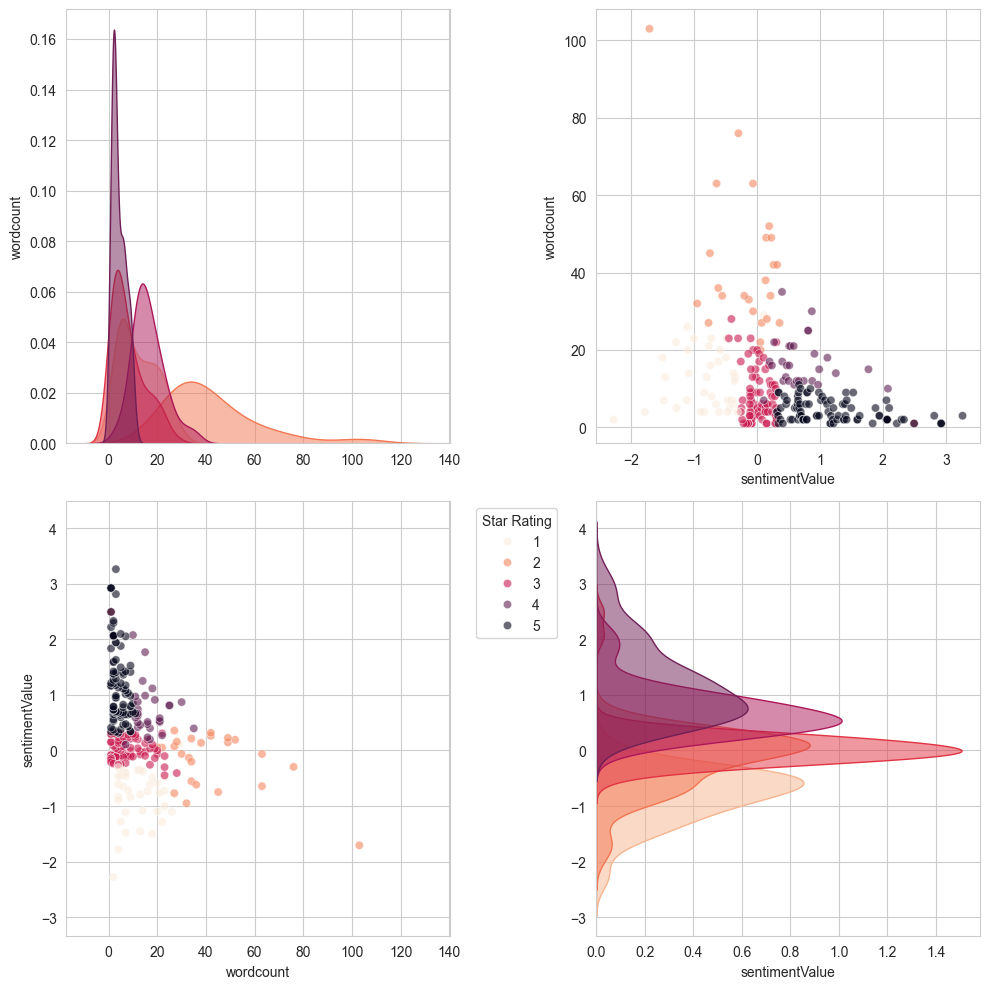

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura
f = plt.figure(figsize=(10, 10))
gs = f.add_gridspec(2, 2)

# Crear el scatter plot principal (panel inferior izquierdo)
ax_scatter = f.add_subplot(gs[1, 0])
sns.scatterplot(
    data=df,
    x="wordcount",
    y="sentimentValue",
    hue="Star Rating",
    palette="rocket_r",
    alpha=0.6,
    ax=ax_scatter
)

# Crear el histograma superior (panel superior izquierdo)
ax_hist_x = f.add_subplot(gs[0, 0], sharex=ax_scatter)
for rating in sorted(df["Star Rating"].unique()):
    subset = df[df["Star Rating"] == rating]
    sns.kdeplot(
        data=subset,
        x="wordcount",
        fill=True,
        alpha=0.5,
        color=sns.color_palette("rocket_r")[rating-1],
        ax=ax_hist_x,
        legend=False
    )

# Crear el histograma lateral (panel inferior derecho)
ax_hist_y = f.add_subplot(gs[1, 1], sharey=ax_scatter)
for rating in sorted(df["Star Rating"].unique()):
    subset = df[df["Star Rating"] == rating]
    sns.kdeplot(
        data=subset,
        y="sentimentValue",
        fill=True,
        alpha=0.5,
        color=sns.color_palette("rocket_r")[rating-1],
        ax=ax_hist_y,
        legend=False
    )

# Crear el scatter plot superior derecho
ax_scatter_top = f.add_subplot(gs[0, 1])
sns.scatterplot(
    data=df,
    x="sentimentValue",
    y="wordcount",
    hue="Star Rating",
    palette="rocket_r",
    alpha=0.6,
    ax=ax_scatter_top,
    legend=False
)

# Ajustar los ejes y etiquetas
ax_hist_x.set_ylabel("wordcount")
ax_hist_y.set_xlabel("sentimentValue")
ax_scatter.set_xlabel("wordcount")
ax_scatter.set_ylabel("sentimentValue")

# Remover etiquetas redundantes
ax_hist_x.set_xlabel("")
ax_hist_y.set_ylabel("")

# Ajustar la leyenda solo en el scatter plot principal
ax_scatter.legend(title="Star Rating", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Separar la variable objetivo (suponiendo que la última columna es la target)
target_column = "Star Rating"  
X = df2.drop(columns=[target_column])  # Características
y = df2[target_column]  # Variable objetivo

# Aplicar MinMaxScaler solo a X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame con nombres originales
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Unir nuevamente con la variable objetivo
df2_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Mostrar los primeros valores escalados
df2_scaled.head()


,wordcount,sentimentValue,Star Rating
0,0.215686,0.323058,1
1,0.186275,0.305047,1
2,0.029412,0.302150,1
3,0.156863,0.299618,1
4,0.049020,0.293209,1


In [39]:
from sklearn.model_selection import train_test_split

# division en train y test (80,20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [31]:
# unicos 

array([1, 2, 3, 4, 5], dtype=int64)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205, 2)
(52, 2)
(205,)
(52,)


## Creamos el Modelo
Entrena con un KNN con el parametro n_neighbors = 5 y evalúa el error en train y en test

In [41]:
from sklearn.neighbors import KNeighborsClassifier
# Inicializar el modelo con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [42]:
print("Accuracy train", knn.score(X_train, y_train))
print("Accuracy test", knn.score(X_test, y_test))

Accuracy train 0.848780487804878
Accuracy test 0.7884615384615384


## Resultados obtenidos

In [ ]:
# Escalando los datos obtenemos un mucho mejor performance (distancia entre sus vecinos en la misma escala!)

In [43]:
y_pred = knn.predict(X_test)

In [44]:
np.unique(y_pred)

array([1, 2, 3, 4, 5])

In [45]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[ 6,  2,  2,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 1,  1, 10,  0,  2],
       [ 0,  1,  1,  5,  0],
       [ 0,  0,  1,  0, 18]])

<Axes: >

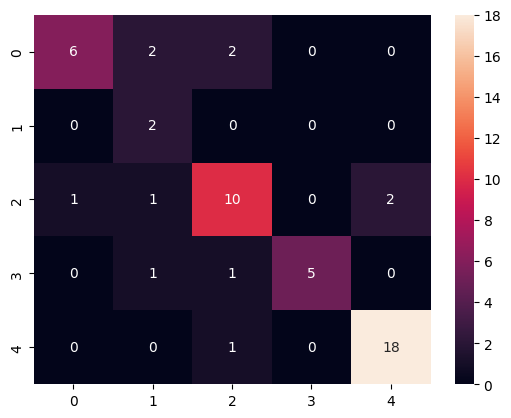

In [46]:
sns.heatmap(c_mat, annot=True)

## ¿Cómo obtener el mejor valor de k?
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [47]:
k_range = range(1,40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

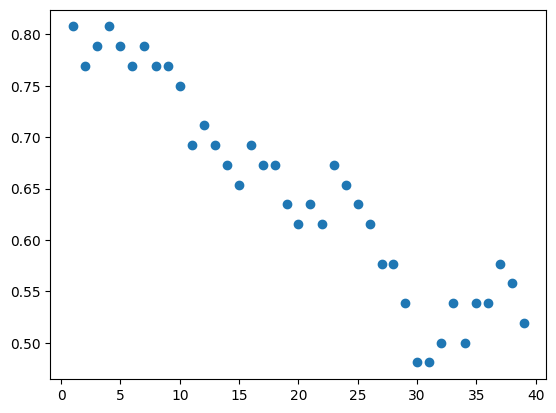

In [48]:
plt.scatter(k_range,scores);

In [49]:
np.array(k_range)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [50]:
np.array(k_range)[scores == max(scores)]

array([], shape=(0, 39), dtype=int64)

## Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [51]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6730769230769231

In [52]:
from sklearn.model_selection import cross_val_score, KFold

In [53]:
knn = KNeighborsClassifier(n_neighbors=18)

In [54]:
kfold = KFold(10, shuffle=True)
results_cv = cross_val_score(knn, scaler.fit_transform(X), y, cv=kfold, scoring='accuracy')

In [55]:
results_cv

array([0.88461538, 0.73076923, 0.84615385, 0.84615385, 0.76923077,
       0.92307692, 0.88461538, 0.8       , 0.84      , 0.88      ])

In [56]:
results_cv.mean()

np.float64(0.8404615384615385)

In [57]:
results_cv.std()

np.float64(0.055763872421628155)